In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
data = pd.read_csv('/Users/varshitanukala/Documents/3rd_2/DM practical/exp 7/covid_19_india.csv')

In [3]:
data.head()

,Sno,Date,Time,State,Cured,Deaths,Confirmed
0,1,30/01/2020,6:00 PM,Kerala,0,0,1
1,2,31/01/2020,6:00 PM,Kerala,0,0,1
2,3,01/02/2020,6:00 PM,Kerala,0,0,2
3,4,02/02/2020,6:00 PM,Kerala,0,0,3
4,5,03/02/2020,6:00 PM,Kerala,0,0,3


In [4]:
data= data.drop(labels = ["Sno","State","Time","Cured","Deaths"], axis= 1, inplace= False)
     

data.head()

,Date,Confirmed
0,30/01/2020,1
1,31/01/2020,1
2,01/02/2020,2
3,02/02/2020,3
4,03/02/2020,3


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

/var/folders/vv/ygv0mhps3894_yd0ng6pm8sw0000gn/T/ipykernel_15047/889507750.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [6]:
data = data.fillna(method='ffill')

/var/folders/vv/ygv0mhps3894_yd0ng6pm8sw0000gn/T/ipykernel_15047/917065080.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


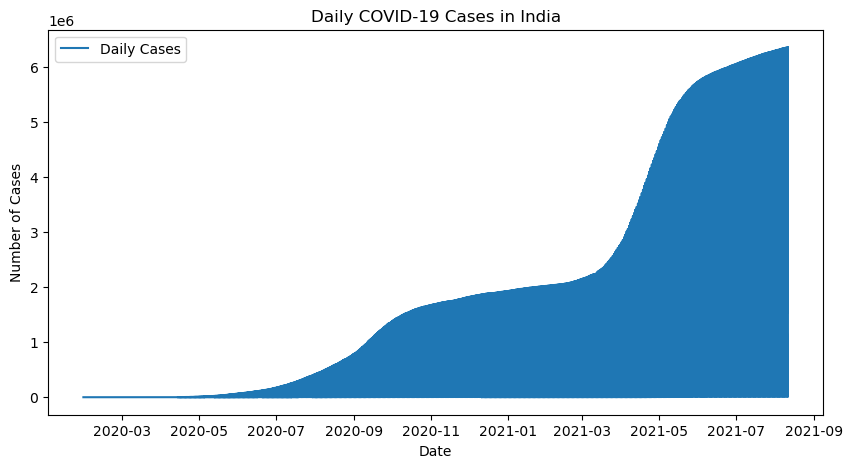

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data['Confirmed'], label='Daily Cases')
plt.title('Daily COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [8]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [9]:
model = ARIMA(train['Confirmed'], order=(5, 1, 0))
model_fit = model.fit()


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
forecast = model_fit.forecast(steps=len(test))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
mse = mean_squared_error(test['Confirmed'], forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1557663328172.3457


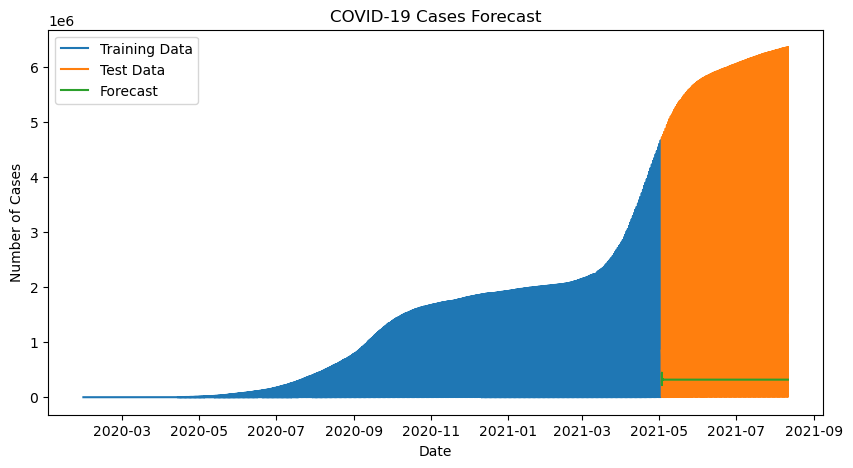

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Confirmed'], label='Training Data')
plt.plot(test.index, test['Confirmed'], label='Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.title('COVID-19 Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()
